<a href="https://colab.research.google.com/github/monarkparekh/MAE-598__Design-Optimization/blob/Assignment-2/MAE_598__Design_Optimization_HW2_Q2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1>MAE 598 Design Optimization: 
Assignment 2, Question 2b</b></h1>

Name: Monark Parekh <br> 
ASU ID: 1222179426


Importing the required libraries

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import math

Defining the Function, Gradient and Hessian matrix

In [165]:
function = lambda x: (2-2*x[0]-3*x[1])**2 + (x[0])**2 + (x[1]-1)**2

def gradient(x): 
  return np.array([(10*x[0]+12*x[1]-8), (12*x[0]+20*x[1]-14)])

Hessian = np.array([[10,12],[12,20]])

<b>Line Search Algorithm</b>

In [168]:
def linesearchalgorithm(x):
    alpha = 1
    t = 0.3
    beta = 0.5
    temp = -1 * gradient(x)
    # Defining the function to calculate phi(alpha)
    def pi(alpha, x):
      return function(x) - alpha * t * np.matmul(np.transpose(gradient(x)), temp)
    # Comparing phi(alpha) and f(x - alpha*gradient)
    while pi(alpha, x) < function(x + alpha*temp):
      alpha = beta * alpha
    # Returning the Final value of alpha
    return alpha

<b>Gradient Descent Algorithm</b>

In [186]:
def gradientdescentalgorithm(function,gradient,Hessian,x0,maximum_iteration):
  epsilon = (10)**-6
  X = []
  gradient_normal = []
  X.append(x0)
  for k in range(0,maximum_iteration):
      gradient_normal.append(np.linalg.norm(gradient(X[k])))

      if gradient_normal[k] <= epsilon:
        x1 = 1-(2*X[k][0]+3*X[k][1])
        error_values = [abs(function(X[i])-function([-1/7,11/14])) for i in range(len(X))]
        X = np.insert(X,0,x1,axis=1)
        print(f'\nThe Gradient Descent Algorithm has converged to a point in {k} iterations\n')
        print(f'Current Gradient Normal is {gradient_normal[k]}\n[x1,x2,x3] = {X[k]}')
        return X,gradient_normal,(k),error_values
      
      alpha = linesearchalgorithm(X[k])
      new_X = X[k] - alpha*gradient(X[k])
      X.append(new_X)

      if k == (maximum_iteration - 1):
        print(f"Number of iterations has exceeded the maxinimum iterations, still not converged to the given threshold.\nCurrent Gradient Normal is {gradient_normal[k]}\nCurrent point is {X[k]}")
        return X,gradient_normal,(k)

 

  

In [187]:
X_val,gradient_normal_val,(k),error_values_all  =  gradientdescentalgorithm(function,gradient,Hessian,np.array([0,0]),1000)


The Gradient Descent Algorithm has converged to a point in 100 iterations

Current Gradient Normal is 9.516108713790478e-07
[x1,x2,x3] = [-1.07142846 -0.142857    0.78571416]


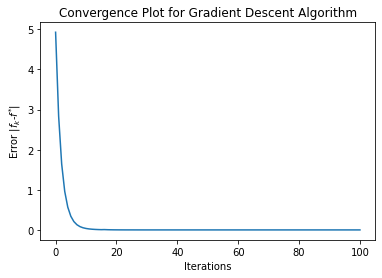

In [205]:
plt.plot(range(0,k+1),error_values_all)
plt.title('Convergence Plot for Gradient Descent Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Error |$f_k$-$f^{*}$|')
plt.show()

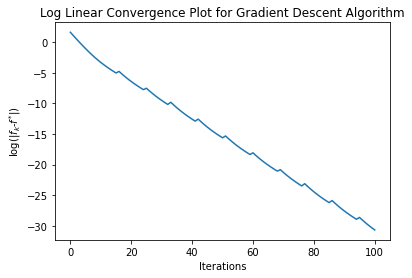

In [208]:
log_error = [math.log(error_values_all[i]) for i in range(len(error_values_all))]
plt.plot(range(0,k+1),log_error)
plt.title('Log Linear Convergence Plot for Gradient Descent Algorithm')
plt.xlabel('Iterations')
plt.ylabel('log(|$f_k$-$f^{*}$|)')
plt.show()

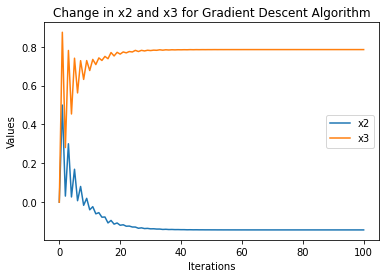

In [213]:
X2_values = []
q = [X2_values.append(i[1]) for i in X_val]
X3_values = []
q = [X3_values.append(i[2]) for i in X_val]
plt.plot(range(0,k+1),X2_values)
plt.plot(range(0,k+1),X3_values)
plt.title('Change in x2 and x3 for Gradient Descent Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.legend(["x2","x3"])
plt.show()

<b>Newton's Algorithm</b>

In [214]:
def newtonsalgorithm(function,gradient,Hessian,x0,maximum_iteration):
  epsilon = (10)**-6
  X = []
  gradient_normal = []
  X.append(x0)
  for k in range(0,maximum_iteration):
      gradient_normal.append(np.linalg.norm(gradient(X[k])))

      if gradient_normal[k] <= epsilon:
        x1 = 1-(2*X[k][0]+3*X[k][1])
        error_values = [abs(function(X[i])-function([-1/7,11/14])) for i in range(len(X))]
        X = np.insert(X,0,x1,axis=1)
        print(f'\nThe Newtons Algorithm has converged to a point in {k} iterations\n')
        print(f'Current Gradient Normal is {gradient_normal[k]}\n[x1,x2,x3] = {X[k]}')
        return X,gradient_normal,(k),error_values
      
      new_X = X[k] - np.matmul(np.linalg.inv(Hessian), gradient(X[k]))
      X.append(new_X)

      if k == (maximum_iteration - 1):
        print(f"Number of iterations has exceeded the maxinimum iterations, still not converged to the given threshold.\nCurrent Gradient Normal is {gradient_normal[k]}\nCurrent point is {X[k]}")
        return X,gradient_normal,(k)

 

  

In [215]:
X_val,gradient_normal_val,(k),error_values_all  =  newtonsalgorithm(function,gradient,Hessian,np.array([0,0]),1000)


The Newtons Algorithm has converged to a point in 1 iterations

Current Gradient Normal is 3.972054645195637e-15
[x1,x2,x3] = [-1.07142857 -0.14285714  0.78571429]


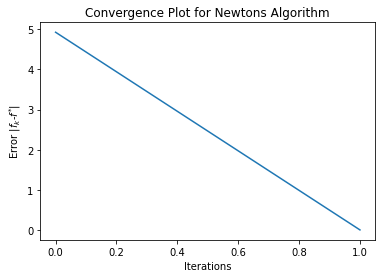

In [216]:
plt.plot(range(0,k+1),error_values_all)
plt.title('Convergence Plot for Newtons Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Error |$f_k$-$f^{*}$|')
plt.show()

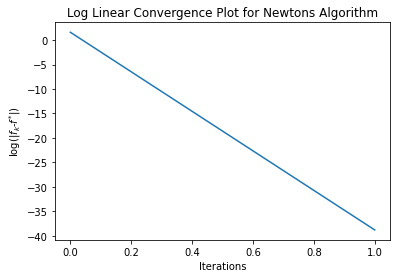

In [217]:
log_error = [math.log(error_values_all[i]) for i in range(len(error_values_all))]
plt.plot(range(0,k+1),log_error)
plt.title('Log Linear Convergence Plot for Newtons Algorithm')
plt.xlabel('Iterations')
plt.ylabel('log(|$f_k$-$f^{*}$|)')
plt.show()

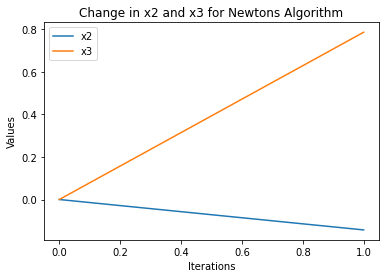

In [218]:
X2_values = []
q = [X2_values.append(i[1]) for i in X_val]
X3_values = []
q = [X3_values.append(i[2]) for i in X_val]
plt.plot(range(0,k+1),X2_values)
plt.plot(range(0,k+1),X3_values)
plt.title('Change in x2 and x3 for Newtons Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.legend(["x2","x3"])
plt.show()